In [1]:
#Importando nossas bibliotecas:
from minisom import MiniSom
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from pylab import pcolor, colorbar, plot
import matplotlib.pyplot as plt

In [2]:
#Definindo o Data Set e as variáveis
base=pd.read_csv('wines.csv')
X=base.iloc[:,1:14].values
y=base.iloc[:,0].values

In [3]:
#Precisamos normalizar nossos dados em uma escala de 0 a 1:
normalizador=MinMaxScaler(feature_range=(0,1))
x=normalizador.fit_transform(X)

In [4]:
#Construindo nosso mapa auto-organizável:
som= MiniSom(x=8, y=8, input_len=13, sigma=1.0, learning_rate=0.5, random_seed=2) # X equivale a quantas linhas nosso mapa vai ter // Y equivale a quantas colunas nosso mapa vai ter // input_len equivale a quantas entradas nosso programa vai ter // sigma equivale ao raio de espaço que irá capturar os neurônios próximos baseados no BMU (best matching unit) // learning_rate equivale a taxa de aprendizagem e é o que define como os valores pesos serão ajustados a cada rodada // random_seed executa a função de nos dar sempre o mesmo resultado de quanto executamos o programa
som.random_weights_init(X) #Atribuindo pesos aleatórios a nossa variavel
som.train_random(data=X,num_iteration=100)

In [5]:
som._weights #abaixo podemos visualizar 8 blocos de vetores e cada um contendo 13 pesos diferentes:

array([[[1.24924538e+01, 1.64742518e+00, 2.30392171e+00, 1.86755666e+01,
         9.64275455e+01, 2.38498283e+00, 2.44409314e+00, 3.75689289e-01,
         1.95471285e+00, 4.28552253e+00, 1.22582201e+00, 2.68590545e+00,
         8.69307502e+02],
        [1.36325594e+01, 3.08704540e+00, 2.26024618e+00, 1.74798288e+01,
         9.63885973e+01, 2.72459560e+00, 2.89554864e+00, 2.84310032e-01,
         1.77765458e+00, 4.94864497e+00, 9.81666907e-01, 3.05012664e+00,
         1.06704024e+03],
        [1.28381548e+01, 1.47362757e+00, 2.26576552e+00, 1.72001563e+01,
         9.11682329e+01, 2.16926021e+00, 1.08176328e+00, 5.27130526e-01,
         1.28385808e+00, 5.18752077e+00, 8.33027036e-01, 1.86118817e+00,
         7.03698547e+02],
        [1.19886602e+01, 2.12026018e+00, 2.81211067e+00, 2.44324054e+01,
         1.13461629e+02, 2.70497556e+00, 3.73732029e+00, 4.36946075e-01,
         1.51648064e+00, 4.93238290e+00, 9.82716019e-01, 3.24688034e+00,
         5.10293772e+02],
        [1.32402167e

In [6]:
som._activation_map #Podemos ver 7 linhas com 8 volumes, e aqui podemos ver os valores do mapa auto organizavel:

array([[160.8739626 , 353.30758464,  61.59681957, 211.24294881,
        149.97199294, 196.50648935, 251.40294532, 100.5978117 ],
       [411.95869429, 199.01090826,  47.78785785,  81.08673703,
        205.7152621 , 268.06980597, 215.82925146,  34.53950944],
       [284.52621832, 340.61553036, 122.47396287, 199.58166009,
        159.20578052, 302.51769899, 130.40317747, 121.96813153],
       [ 83.17842689, 109.03673325, 251.62193871,  88.90927532,
         69.13949921, 126.05014994, 276.17526189, 315.82880157],
       [181.16289703, 207.13626713,  98.35877912, 192.36724821,
        119.37039407, 173.82793422, 174.18728466, 333.68647022],
       [389.04599348, 165.71640122, 127.6811237 , 114.44756337,
        189.06984003,  90.49777817, 114.2055625 ,  63.44956211],
       [109.17462893, 256.00862276, 484.12032093, 468.82797394,
        249.00948618,  58.42276292, 186.00379226, 133.4486464 ],
       [131.16287528, 147.24997678, 380.93136411, 576.13303876,
        746.52852157, 316.1063555

In [7]:
q=som.activation_response(X) #Criando a variavel "q" para receber "x" usando o act_resp para transformar X em uma matriz 8x8, assim como conseguimos visualizar quantas vezes cada um dos neurônios foi selecionado como BMU

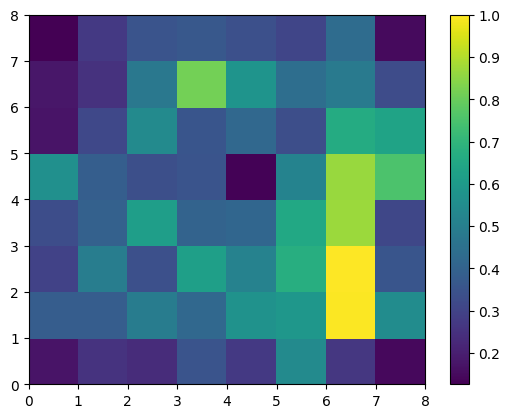

In [8]:
pcolor(som.distance_map().T) #Irá nos retornar uma matriz com os valores de distância // Além disso essa função irá calcular o valor MID (Mean Inter Neuron Distance) ou seja ira calcular a média da distância de cada neurônio em relação aos seus vizinhos // Colocamos o ".T" pois ele irá retornar a matriz transposta. (O que era coluna vira linha e o que era linha vira coluna)
colorbar()

In [9]:
#O Color Bar acima indica que, quanto mais escuro for o neurônio (média próxima de 0), maior é a semelhança dele com seus vizinhos. E quanto mais claro ele for (mais próximo de 1), mais diferente ele é dos seus vizinhos.

In [10]:
w=som.winner(X[2]) #Ira nos retornar neurônio ganhador dentro de cada um dos registros ou o BMU (em suma o melhor neurônio)
markers=['o','s','D'] #Criando uma lista com valores aleatórios
color=['r','g','b'] #Criando uma lista de cores sendo R=Red,G=green,B=blue

In [11]:
#y[y==1]=0 #Se o Y for igual a 1, ele será atribuido a 0
#y[y==2]=1 #Se o Y for igual a 2, ele será atribuido a 1
#y[y==3]=2 #Se o Y for igual a 3, ele será atribuido a 2

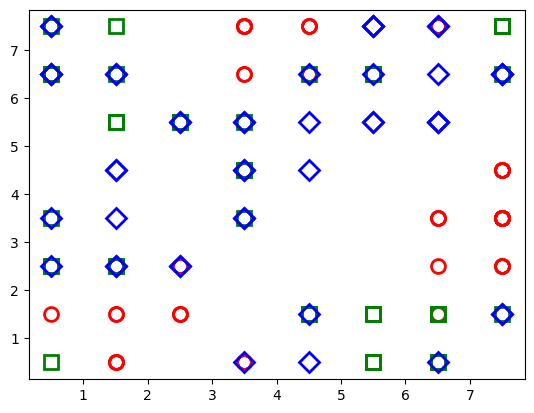

In [12]:
# Itera sobre os dados 'x' usando o índice 'i'
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, markers[y[i]-1], # como y contém valores 1, 2, e 3, precisamos substrair 1 para corresponder aos índices 0, 1 e 2
         markerfacecolor='None', markersize=10,
         markeredgecolor=color[y[i]-1], markeredgewidth=2)